Group Project Proposal

Title:

# Introduction (Alvin):

Introduction (Alvin):
The goal of our data analysis is to create a classification model that is able to predict a patient's likelihood of having a heart disease, to a high degree of accuracy. Using the re-processed data Cleavland Heart Disease from the UCI database, we will first observe the relationships between factors, such as age, cholesterol levels and resting heart rate, with those that test positive with heart diseases. We will then use the strongest relationships to build our classification model.

***rough draft - Alvin***


# Preliminary exploratory data analysis (Wayne):


In [1]:
library(tidyverse)
library(repr)
library(rvest)
library(readxl)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ re

## Reading data from the web

In [2]:
#Preliminary exploratory data analysis (Wayne):

url <- "https://raw.githubusercontent.com/aChipmunka/dsci100_2023s1_group21/main/project/data/heart_cleveland.csv"
cleveland_data <- read_csv(url)|>
                  mutate(condition = as_factor (condition)) 
cleveland_data




Rows: 297 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
60,0,0,150,240,0,0,171,0,0.9,0,0,0,0


This data is in tidy format. `condition` has been changed to a `factor`, as it is a categorical variable indicating the presence (contion = 1) and absence (condition = 0) of the heart disease. 

## Table

In [3]:
#Spliting the data into training and testing set
set.seed(2023)

cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = condition)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

#Creating a summary table
table_1 <- cleveland_train|>
         group_by (condition)|>
         summarize(average_age = mean(age), average_cholestoral = mean(chol))
table_1

condition,average_age,average_cholestoral
<fct>,<dbl>,<dbl>
0,51.98333,243.0667
1,56.63725,251.1667


This table shows that people with heart disease have a higher average age and cholestoral level. Therefore, age and cholestoral may be two varaibles that can help predict heart disease. 

## Visualization

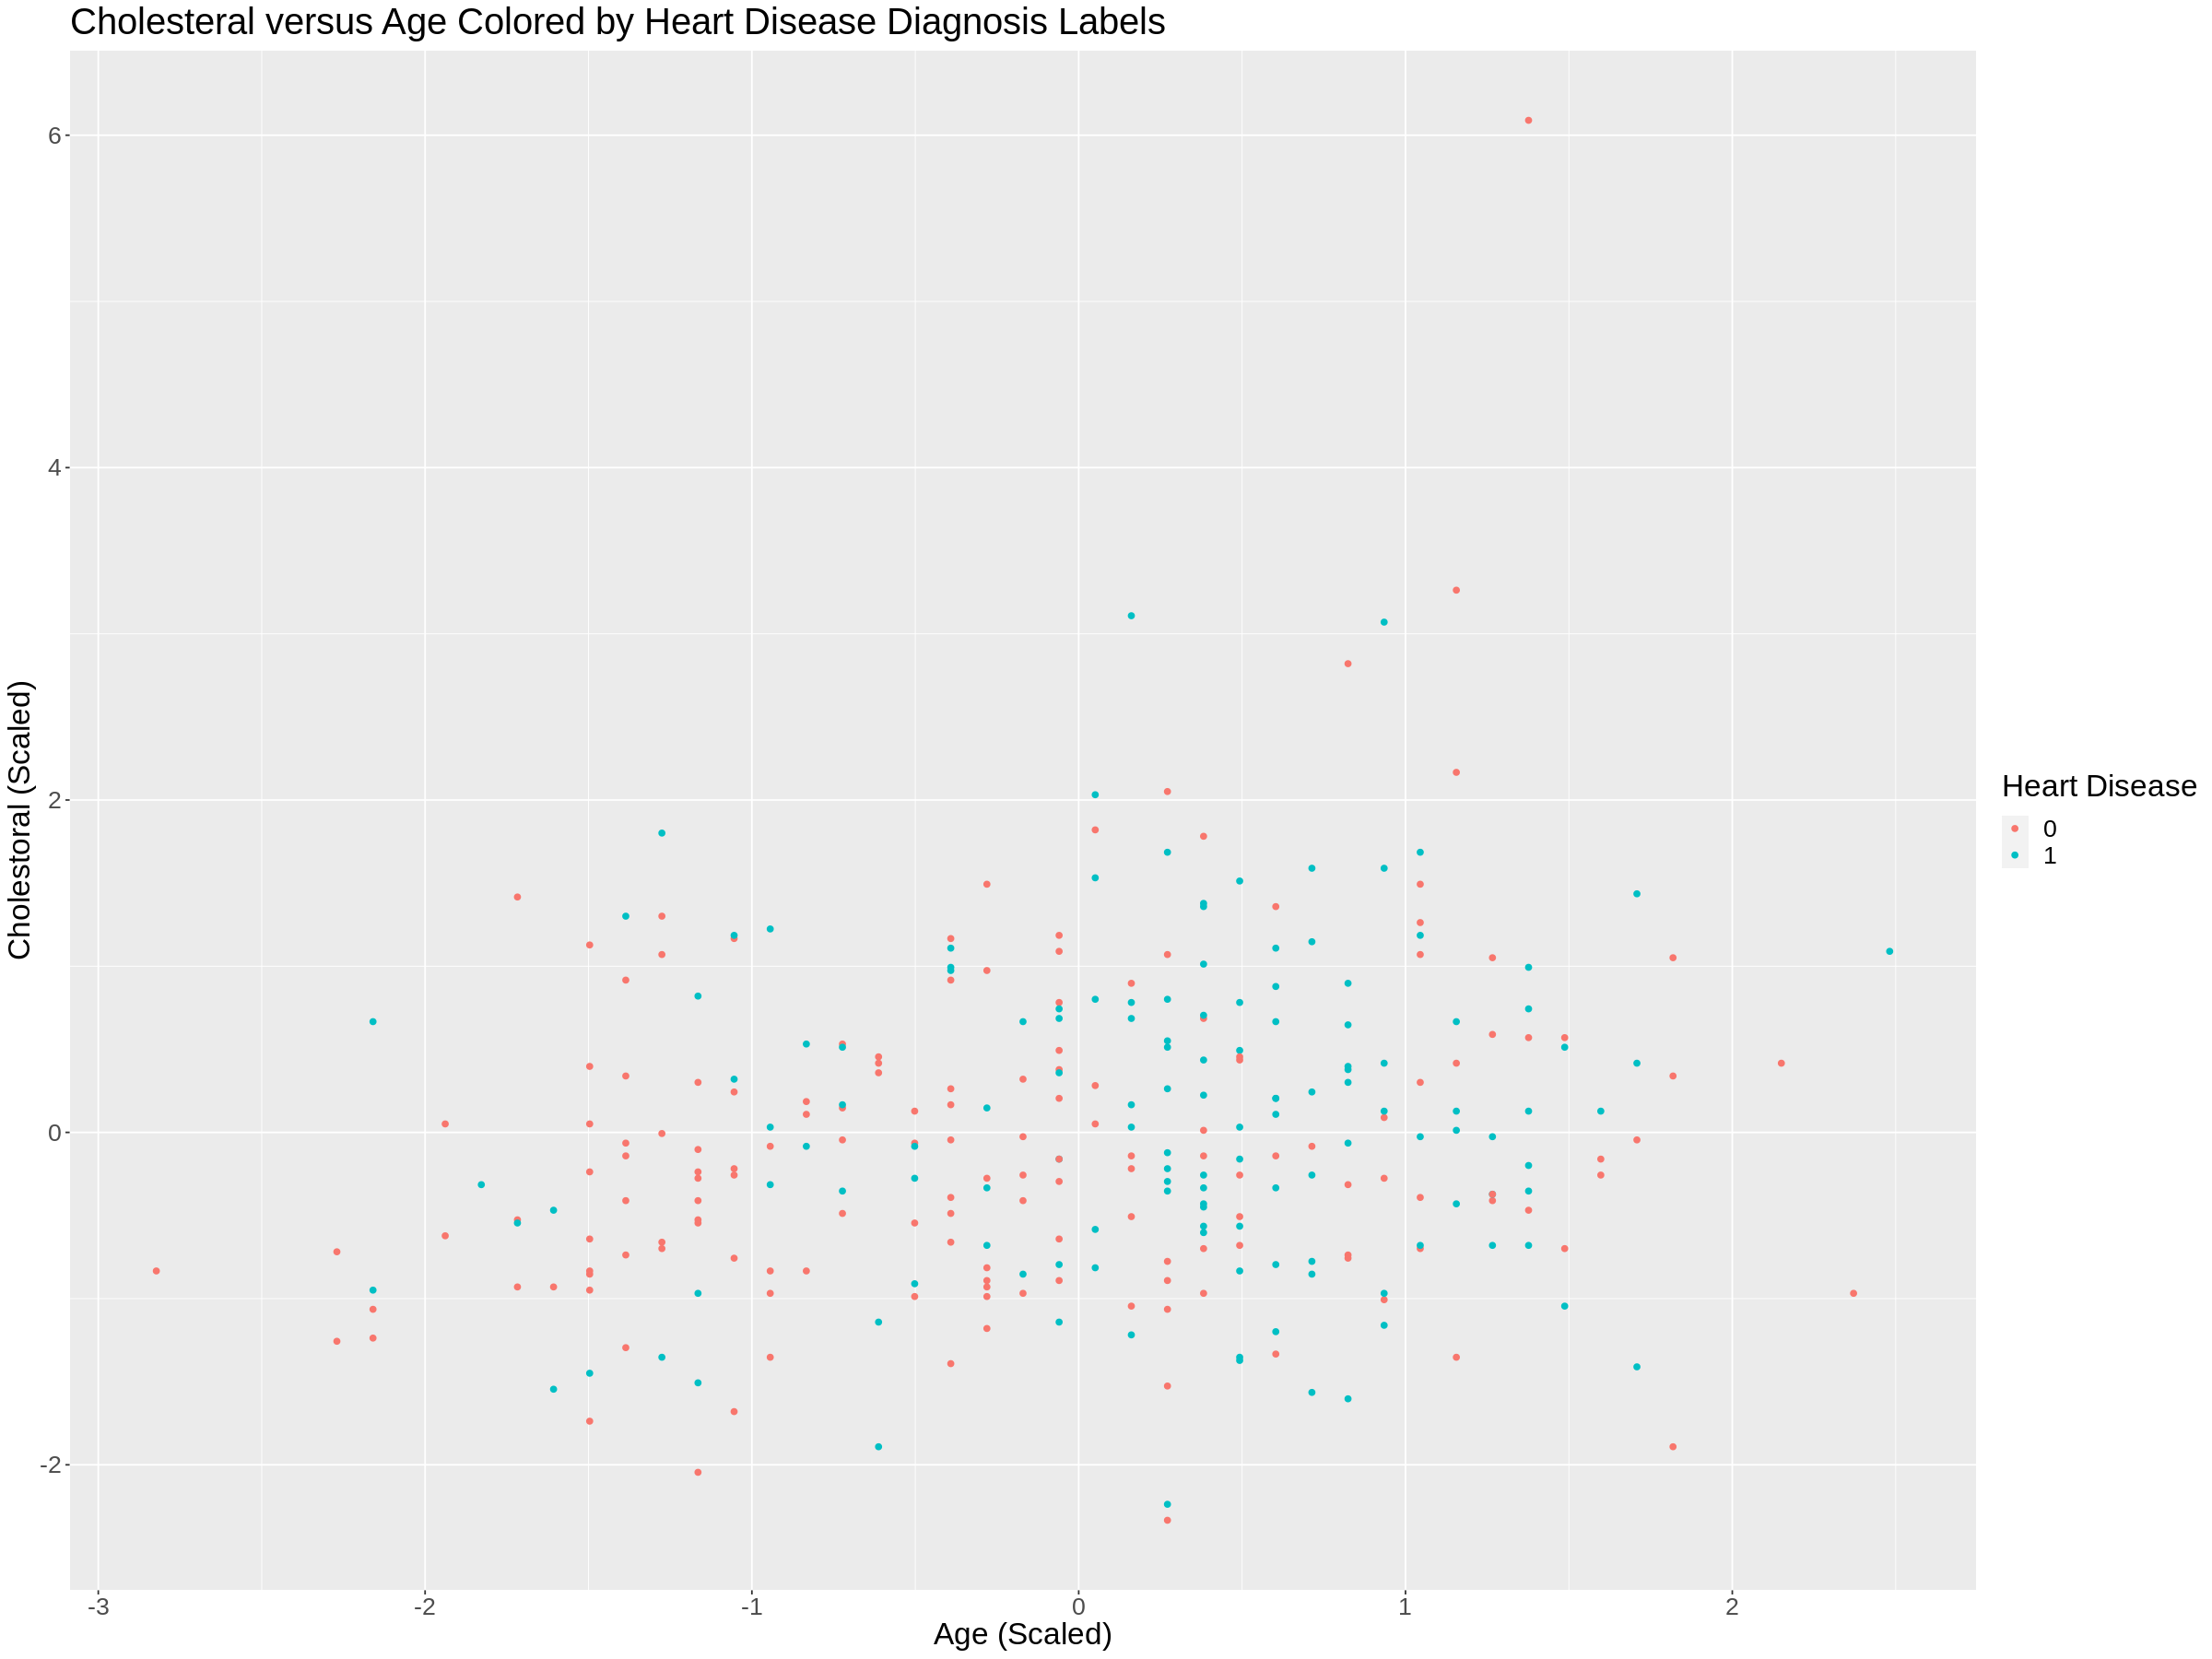

In [15]:
#Standardizing the variables

cleveland_recipe <- recipe(condition ~ age + chol, data = cleveland_data)|>
                    step_scale(all_predictors())|>
                    step_center(all_predictors())
cleveland_scaled <- cleveland_recipe|>
                    prep()|>
                    bake(cleveland_data)
#Creating a scatter plot
options(repr.plot.width=20, repr.plot.height=15)

cleveland_plot <- cleveland_scaled|> 
                  ggplot(aes(x= age, y= chol))+
                  geom_point(aes(color = condition))+
                  labs(x = "Age (Scaled)", y = "Cholestoral (Scaled)", color = "Heart Disease")+
                  theme(text = element_text(size = 20))+
                  ggtitle("Cholesteral versus Age Colored by Heart Disease Diagnosis Labels")
cleveland_plot

In [ ]:
Methods (Peter):




In [ ]:
Expected outcomes and significance (Vincent):





# Expected Outcomes and Significance (Vincent)


## What do you expect to find?

## What impact could such findings have?

## What future questions could this lead to?